In [1]:
from src.__main__ import _check
import numpy as np
from src.filters import AnomalyType, SingleAnomaly, MergedAnomalies
import plotly_express as px
from src.filters import SignalType

In [2]:


segments_icp, names = _check(signal=SignalType.icp, workers=6)

In [3]:
segments_abp, names = _check(signal=SignalType.abp , workers=6)

In [4]:
segments_icp

[[SingleAnomaly(start=48504.78, end=50465.0, type=<AnomalyType.max: 'max'>),
  SingleAnomaly(start=102803.0, end=102803.0, type=<AnomalyType.max: 'max'>),
  SingleAnomaly(start=4179.44, end=4186.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=4192.1, end=4194.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=14742.18, end=14744.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=42266.7, end=42266.7, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=45158.8, end=45164.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=50465.36, end=50469.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=50633.18, end=50635.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=50651.94, end=50655.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=50681.76, end=50689.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=52137.24, end=52138.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=52147.78, end=52152.0, type=<AnomalyType.min: 'min'>),
  Sin

In [5]:
segments_abp

[[SingleAnomaly(start=48504.78, end=50465.04, type=<AnomalyType.max: 'max'>),
  SingleAnomaly(start=160556.52, end=160556.52, type=<AnomalyType.max: 'max'>),
  SingleAnomaly(start=10569.24, end=10569.24, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=10583.94, end=10583.94, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=33092.3, end=33101.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=33112.96, end=33112.96, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=33118.56, end=33123.06, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=51020.52, end=51020.52, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=53637.46, end=53647.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=53659.9, end=53659.9, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=76722.92, end=76728.0, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=76740.52, end=76740.52, type=<AnomalyType.min: 'min'>),
  SingleAnomaly(start=82396.78, end=82396.78, type=<AnomalyType.min:

In [6]:
from src.__main__ import merge_signals
from src.config import load_config
from copy import deepcopy

all_signals = [[sig1,sig2] for sig1, sig2 in zip(deepcopy(segments_abp), deepcopy(segments_icp))]
all_signals = merge_signals(all_signals, load_config())

In [7]:
def get_types(signal: list[list[SingleAnomaly | MergedAnomalies]],type: AnomalyType | str):
    picked = []
    total_time: float = 0
    for file in signal:
        for segment in file:
            if isinstance(segment,MergedAnomalies):
                if type in segment.type:
                    picked.append(segment)
                    total_time+=segment.length(type)
            elif segment.type == type:
                picked.append(segment)
                total_time+=segment.length()
    return len(picked), total_time

In [8]:
types = [type.value for type in AnomalyType]

In [9]:
print(f"icp: {sum([len(file) for file in segments_icp])}, abp: {sum([len(file) for file in segments_abp])}, together:{sum([len(file) for file in all_signals])}")

icp: 8164, abp: 3474, together:11638


In [10]:
print(f"icp: {sum([len(file) for file in segments_icp])}, abp: {sum([len(file) for file in segments_abp])}, together:{sum([len(file) for file in all_signals])}")

icp: 8164, abp: 3474, together:11638


In [11]:
segments_abp_types = np.array([get_types(segments_abp,type) for type in types])
segments_icp_types = np.array([get_types(segments_icp, type) for type in types])
all_signals_types = np.array([get_types(all_signals, type) for type in types])

In [12]:
segments_icp_types[:,0]

array([ 112., 3039., 4987.,   26.])

In [13]:
tmp=np.array([*zip(segments_abp_types[:,0], segments_icp_types[:,0],all_signals_types[:,0])]).swapaxes(0,1)
tmp = dict(zip(["abp","icp","dohromady"],tmp))
tmp
# dict(zip(types)))



{'abp': array([ 607., 1263., 1596.,    8.]),
 'icp': array([ 112., 3039., 4987.,   26.]),
 'dohromady': array([ 719., 4302., 6583.,   34.])}

In [14]:
tmp_time=np.array([*zip(segments_abp_types[:,1], segments_icp_types[:,1],all_signals_types[:,1])]).swapaxes(0,1)
tmp_time = dict(zip(["abp","icp","dohromady"],tmp_time))
tmp_time
# dict(zip(types)))

{'abp': array([123421.64, 367984.08, 597320.  , 177997.  ]),
 'icp': array([ 123993.58,   30979.2 ,  474210.  , 1329637.  ]),
 'dohromady': array([ 247415.22,  398963.28, 1071530.  , 1507634.  ])}

In [15]:
fig = px.bar(tmp,barmode='group')
fig.update_xaxes(tickvals=np.arange(4),ticktext=["maximum","minimum","lineárnost","počítání vrcholů"])
fig.update_layout(xaxis_title="",yaxis_title="počet úseků", legend_title="",font={"size":30})
fig

In [17]:
fig = px.bar(tmp_time,barmode='group',)
fig.update_xaxes(tickvals=np.arange(4),ticktext=["maximum","minimum","lineárnost","počítání vrcholů"])
fig.update_layout(xaxis_title="",yaxis_title="počet sekund", legend_title="", font={"size":30})
fig

In [2]:

from pathlib import Path
from typing import Literal, cast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.typing as npt
from scipy.signal import ricker
import wfdb
from src.filters import SignalType, SingleAnomaly, MergedAnomalies, Signal
from src.__main__ import check, dataset_files, _check
from rich.progress import Progress
from copy import deepcopy

In [3]:
def load_signal(path:Path, sig: SignalType | Literal["ECG"]) -> Signal:
    if sig == "ECG":
        signals, fields = wfdb.rdsamp(path)
        signal_type = fields["sig_name"].index("ECG")
        return Signal(
            signal = signals[:, signal_type].astype(np.float64),
            fs=fields["fs"],
            peaks_per_second=0,
            path=path,
            wavelet=ricker,
            wavelet_len=5,
        )
    else:    
        return Signal.load_signal(path,sig)

In [4]:
from math import ceil, floor


def corr(first_signal_type: SignalType | Literal["ECG"],second_signal_type: SignalType,path: Path = Path("data/"), workers:int = 6) -> tuple[list[float],list[float]]:
    with Progress() as progress:
        files: list[Path] = list(dataset_files(path))
        corr = []
        corr_file_mean = []
        corr_file_std = []
        experiment_file = progress.add_task("file",total=len(files))
        for file in files:
            file_corr = []
            segments, _ = _check(input=file, progress=progress,workers=workers)
            first_signal = load_signal(file,first_signal_type)
            second_signal = load_signal(file,second_signal_type)
            for segment in segments[0]:
                first_segment = first_signal.signal[floor(first_signal.fs * segment.start): ceil(first_signal.fs * segment.end)]
                second_segment = second_signal.signal[floor(second_signal.fs * segment.start): ceil(second_signal.fs * segment.end)]
                if len(first_segment) < 3 or len(second_segment) < 3:
                    continue
                corr_actual = np.corrcoef(first_segment,second_segment)
                file_corr.append(corr_actual[0][1])
            corr.extend(file_corr)
            corr_file_mean.append(np.mean(file_corr))
            corr_file_std.append(np.std(file_corr))
            progress.update(experiment_file,advance = 1)
        corr_file_mean.append(np.mean(corr))
        corr_file_std.append(np.std(corr))
        
    return corr_file_mean, corr_file_std
        
    


In [5]:
abp_icp = corr(SignalType.abp, SignalType.icp, workers=4)

Output()

In [6]:
bar = {"průměr": abp_icp[0], "směrodatná odchylka": abp_icp[1]}
fig = px.bar(bar,barmode="group")
fig.update_layout(xaxis_title="",yaxis_title="", legend_title="", font={"size":30},title={"text":"korelace: abp - icp", "x":0.5, "y":0.95})
fig.update_xaxes(tickvals=np.arange(14),ticktext=["1","2","3","4","5","6","7","8","9","10","11","12","13","celkem"])
fig

In [7]:
ecg_icp = corr("ECG", SignalType.icp, workers=4)

Output()

In [8]:
ecg_icp[0][7]

0.01733616964435277

In [9]:
bar = {"průměr": ecg_icp[0], "směrodatná odchylka": ecg_icp[1]}
fig = px.bar(bar,barmode="group")
fig.update_layout(xaxis_title="",yaxis_title="", legend_title="", font={"size":30},title={"text":"korelace: ekg - icp", "x":0.5, "y":0.95})
fig.update_xaxes(tickvals=np.arange(14),ticktext=["1","2","3","4","5","6","7","8","9","10","11","12","13","celkem"])
fig

In [10]:
ecg_abp = corr("ECG", SignalType.abp, workers= 4)

Output()

In [11]:
bar = {"průměr": ecg_abp[0], "směrodatná odchylka": ecg_abp[1]}
fig = px.bar(bar,barmode="group")
fig.update_layout(xaxis_title="",yaxis_title="", legend_title="", font={"size":30},title={"text":"korelace: ekg - abp", "x":0.5, "y":0.95})
fig.update_xaxes(tickvals=np.arange(14),ticktext=["1","2","3","4","5","6","7","8","9","10","11","12","13","celkem"])
fig

In [13]:
abp_icp[0]

[0.30009820247383967,
 0.01067675899042395,
 0.05222419596286596,
 0.11225959107279238,
 0.012880612122283377,
 0.04523122204471002,
 0.0143116863272628,
 0.013936264506871049,
 0.043688202162931206,
 -0.011706244486434906,
 0.08542243455321724,
 -0.06635170097761368,
 0.015767079400313393]

In [2]:

def plot(path: Path, sig: SignalType | Literal["ECG"],segmented_signal: list[SignalType]| None = None,plot_anomalies: bool=True):
    if plot_anomalies:
        segments,_= _check(segmented_signal,input=path)
    _, axes = plt.subplots(figsize=(200,20))
    signal = load_signal(path,sig)
    # signals, fields = wfdb.rdsamp(path)
    # fs = fields["fs"]

    # signal_type = fields["sig_name"].index(sig)
    # signal: npt.NDArray = signals[:, signal_type].astype(np.float64)
    # del signals
    sns.lineplot(y=signal.signal,x=np.arange(0,len(signal.signal)),ax=axes)
    if plot_anomalies:
        for segment in segments[0]:
            # print(int(segment.start * signal.fs), int(segment.end * signal.fs))
            sns.lineplot(y=signal.signal[int(segment.start * signal.fs):int(segment.end * signal.fs)],x=np.arange(int(segment.start * signal.fs), int(segment.end * signal.fs)), ax=axes, color='r')




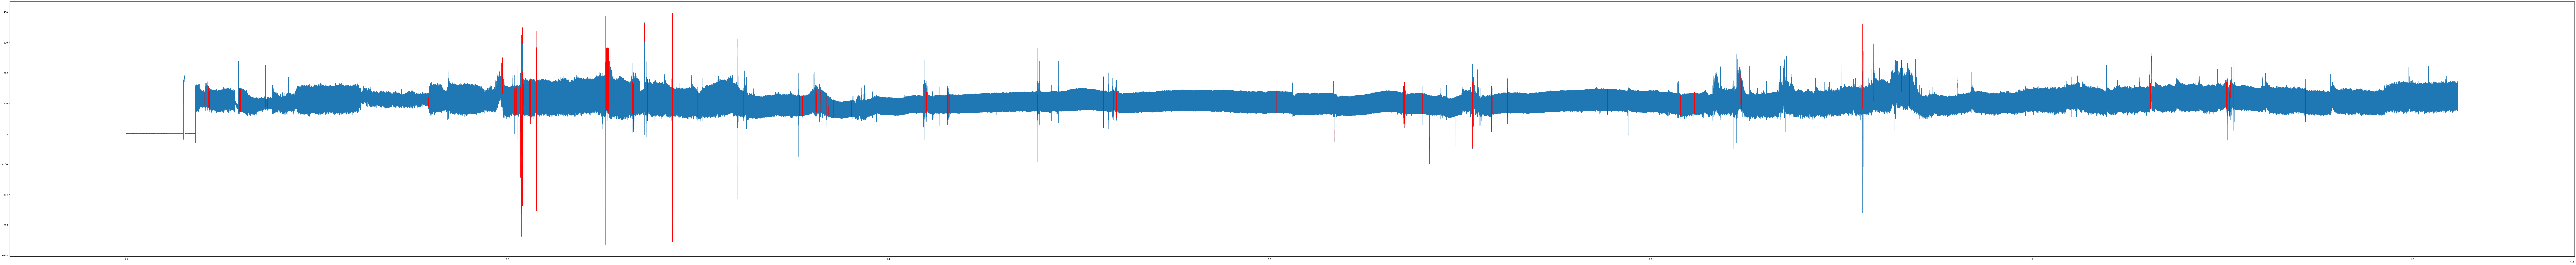

In [22]:
plot(Path("data/charis1"), SignalType.abp)

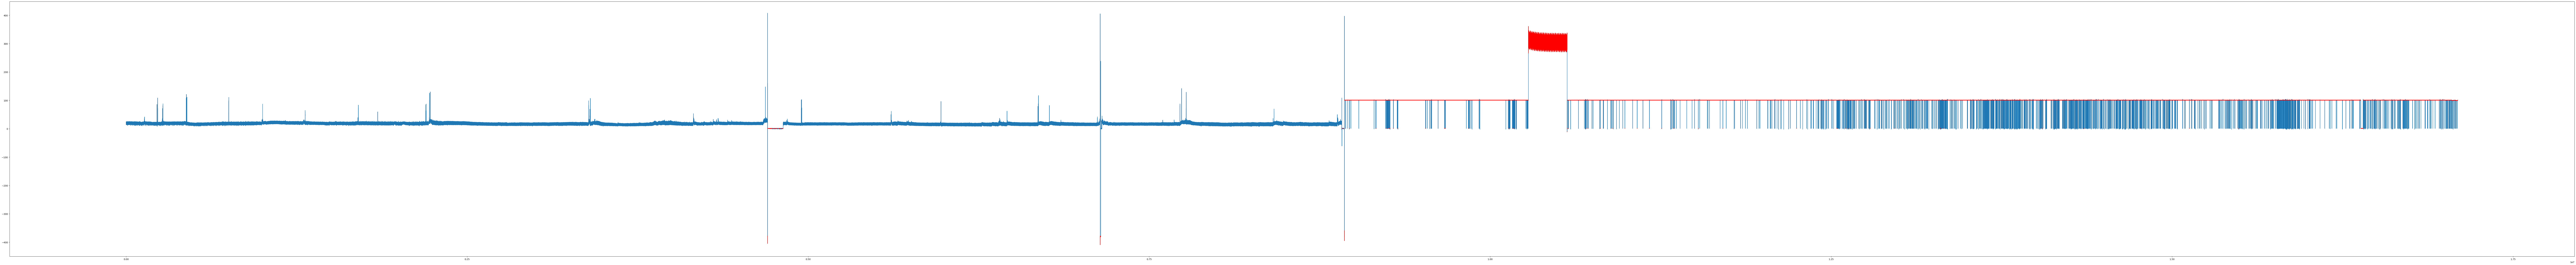

In [4]:
plot(Path("data/charis3"), sig = SignalType.icp, segmented_signal=[SignalType.abp])

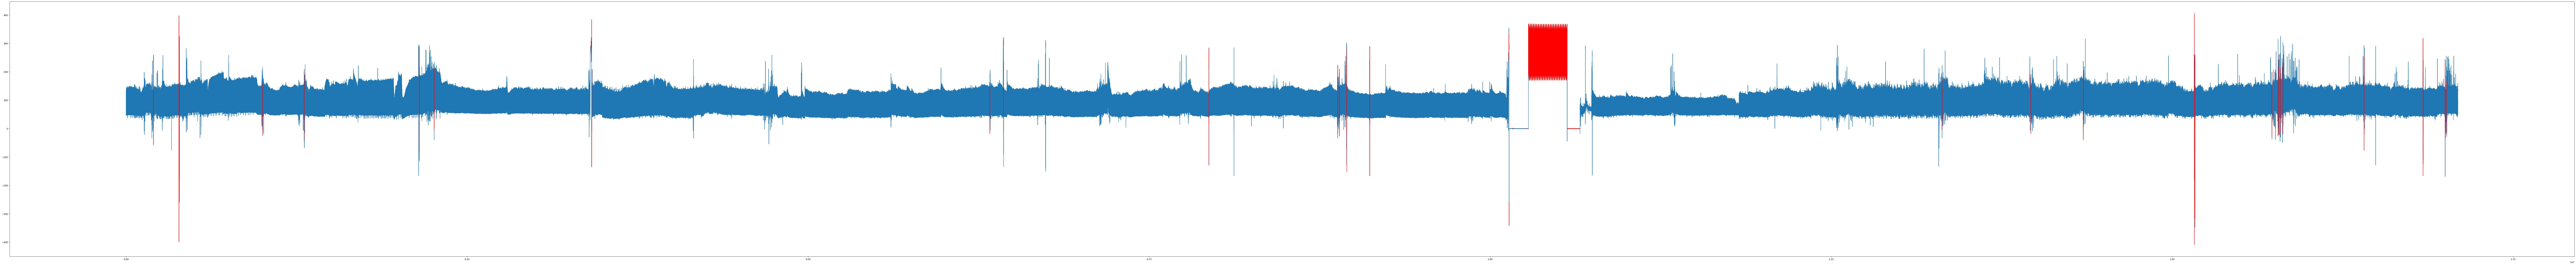

In [ ]:
plot(Path("data/charis3"), sig = SignalType.abp, segmented_signal=[SignalType.abp])

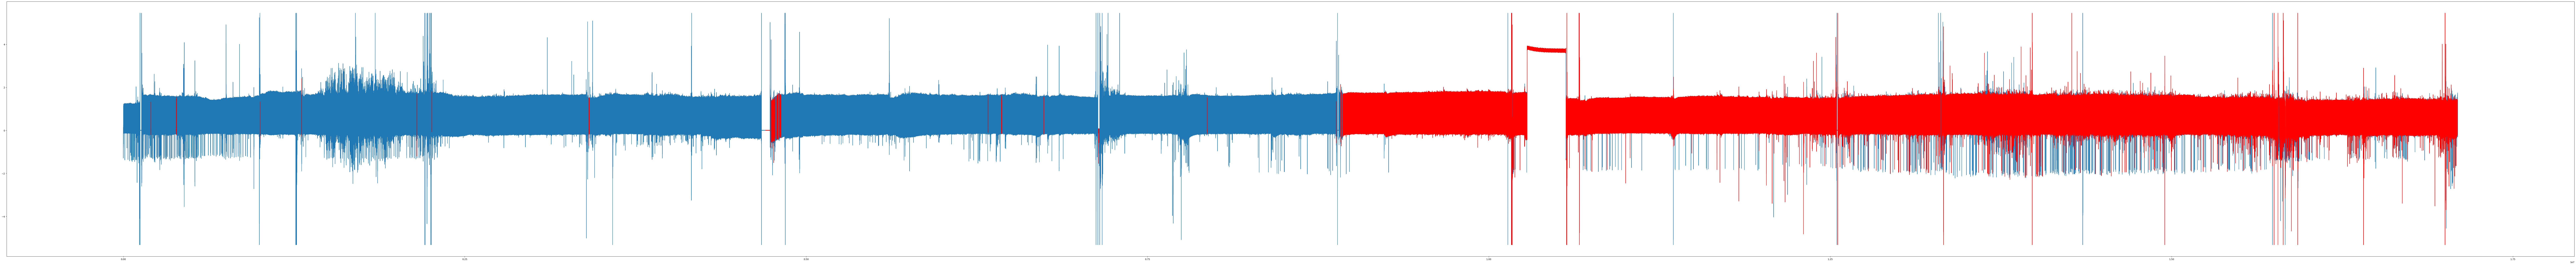

: 

In [3]:
plot(Path("data/charis3"), sig = "ECG", segmented_signal=[SignalType.abp, SignalType.icp])

Output()

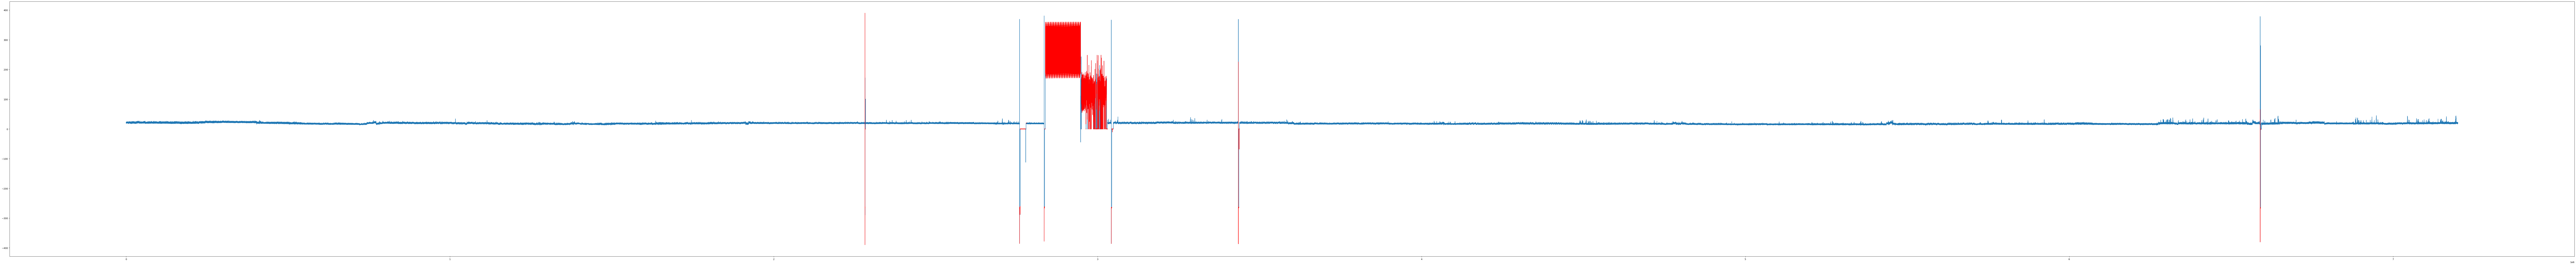

In [6]:
plot(Path("data/charis4"), SignalType.icp, all_signals=False)

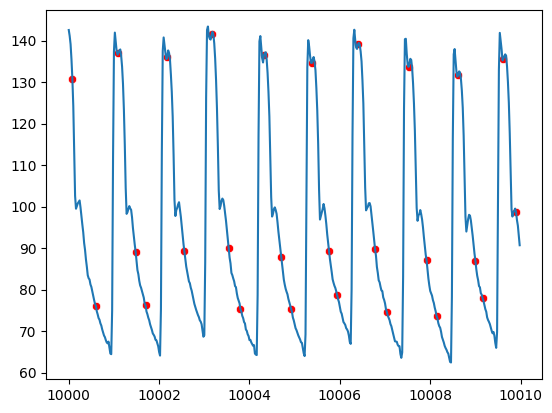

In [7]:
Signal.load_signal(Path("data/charis4"), SignalType.abp).look(10000,10010)